# Introduction

This report analyzes residential mortgage lending in 2024 using data collected under the Home Mortgage Disclosure Act (HMDA), a statute enacted in 1975 to promote transparency in housing credit. HMDA data are used to evaluate whether lenders meet community needs, guide public investment, and identify potential disparities in access to credit. Covered institutions report detailed information on applications, loan characteristics, property locations, pricing, and applicant demographics. This analysis focuses on closed-end, first-lien home purchase loans secured by site-built, one- to four-family principal residences, excluding reverse mortgages, and examines denial rates, interest rates, and total loan costs by race and ethnicity. 

The data can be obtained at: https://ffiec.cfpb.gov/data-publication/snapshot-national-loan-level-dataset/2024

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
# import seaborn as sns # type: ignore
# import csv
# import re
# import unicodedata
# from scipy.stats import chi2_contingency
# import statsmodels.api as sm # type: ignore
# import statsmodels.formula.api as smf # type: ignore

# Preprocessing

## Selected features

This analysis uses the following features:

| Field Name                              | Max Length | Type         | Description                                                                 | NA Count |
|-----------------------------------------|------------|--------------|-----------------------------------------------------------------------------|----------|
| derived_dwelling_category               | 38         | Alphanumeric | Dwelling type derived from construction method & units                      | 0        |
| derived_ethnicity                       | 23         | Alphanumeric | Aggregated ethnicity from applicant/co-applicant fields                     | 0        |
| derived_race                            | 41         | Alphanumeric | Aggregated race from applicant/co-applicant fields                          | 0        |
| action_taken                            | 1          | Numeric      | Action taken on loan or application                                         | 0        |
| loan_type                               | 1          | Numeric      | Type of loan: Conventional, FHA, VA, RHS/FSA                                | 0        |
| loan_purpose                            | 2          | Numeric      | Purpose of the loan (purchase, refinance, etc.)                             | 0        |
| lien_status                             | 1          | Numeric      | Lien status of the loan (first or subordinate)                              | 0        |
| reverse_mortgage                        | 4          | Numeric      | Whether loan is a reverse mortgage                                          | 0        |
| open_end_line_of_credit                 | 4          | Numeric      | Whether loan is an open-end line of credit                                  | 0        |
| business_or_commercial_purpose          | 4          | Numeric      | Whether loan is primarily for business/commercial                           | 0        |
| loan_amount                             | —          | Alphanumeric | Amount of the loan or amount applied for                                    | 0        |
| interest_rate                           | —          | Alphanumeric | Interest rate for the loan or application                                   | 0        |
| total_loan_costs                        | —          | Alphanumeric | Total loan costs in dollars                                                 | 1021043  |
| loan_term                               | —          | Alphanumeric | Loan maturity term in months                                                | 1021043  |
| intro_rate_period                       | —          | Alphanumeric | Months until first interest rate change                                     | 1021043  |
| occupancy_type                          | 1          | Numeric      | Occupancy type (principal, second, investment)                              | 0        |
| income                                  | —          | Alphanumeric | Applicant’s gross annual income (thousands)                                 | 109349   |
| debt_to_income_ratio                    | —          | Alphanumeric | Ratio of total monthly debt to monthly income                               | 545694   |


In [2]:
# we will only use selected columns in our analysis
selected_columns = [
    # 'activity_year',
    # 'lei',
    # 'derived_msa_md',
    # 'state_code',
    # 'county_code',
    # 'census_tract',
    # 'conforming_loan_limit',
    # 'derived_loan_product_type',
    'derived_dwelling_category',
    'derived_ethnicity',
    'derived_race',
    # 'derived_sex',
    'action_taken',
    # 'purchaser_type',
    # 'preapproval',
    'loan_type',
    'loan_purpose',
    'lien_status',
    'reverse_mortgage',
    'open_end_line_of_credit',
    'business_or_commercial_purpose',
    'loan_amount',
    # 'combined_loan_to_value_ratio',
    'interest_rate',
    # 'rate_spread',
    # 'hoepa_status',
    'total_loan_costs',
    # 'total_points_and_fees',
    # 'origination_charges',
    # 'discount_points',
    # 'lender_credits',
    #'loan_term',
    # 'prepayment_penalty_term',
    'intro_rate_period',
    # 'negative_amortization',
    # 'interest_only_payment',
    # 'balloon_payment',
    # 'other_nonamortizing_features',
    # 'property_value',
    #'construction_method',
    'occupancy_type',
    # 'manufactured_home_secured_property_type',
    # 'manufactured_home_land_property_interest',
    # 'total_units',
    # 'multifamily_affordable_units',
    'income',
    'debt_to_income_ratio',
    # 'applicant_credit_score_type',
    # 'co_applicant_credit_score_type',
    # 'applicant_ethnicity_1',
    # 'applicant_ethnicity_2',
    # 'applicant_ethnicity_3',
    # 'applicant_ethnicity_4',
    # 'applicant_ethnicity_5',
    # 'co_applicant_ethnicity_1',
    # 'co_applicant_ethnicity_2',
    # 'co_applicant_ethnicity_3',
    # 'co_applicant_ethnicity_4',
    # 'co_applicant_ethnicity_5',
    # 'applicant_ethnicity_observed',
    # 'co_applicant_ethnicity_observed',
    # 'applicant_race_1',
    # 'applicant_race_2',
    # 'applicant_race_3',
    # 'applicant_race_4',
    # 'applicant_race_5',
    # 'co_applicant_race_1',
    # 'co_applicant_race_2',
    # 'co_applicant_race_3',
    # 'co_applicant_race_4',
    # 'co_applicant_race_5',
    # 'applicant_race_observed',
    # 'co_applicant_race_observed',
    # 'applicant_sex',
    # 'co_applicant_sex',
    # 'applicant_sex_observed',
    # 'co_applicant_sex_observed',
    # 'applicant_age',
    # 'co_applicant_age',
    # 'applicant_age_above_62',
    # 'co_applicant_age_above_62',
    # 'submission_of_application',
    # 'initially_payable_to_institution',
    # 'aus_1',
    # 'aus_2',
    # 'aus_3',
    # 'aus_4',
    # 'aus_5',
    # 'denial_reason_1',
    # 'denial_reason_2',
    # 'denial_reason_3',
    # 'denial_reason_4',
    # 'tract_population',
    # 'tract_minority_population_percent',
    # 'ffiec_msa_md_median_family_income',
    # 'tract_to_msa_income_percentage',
    # 'tract_owner_occupied_units',
    # 'tract_one_to_four_family_homes',
    # 'tract_median_age_of_housing_units'
]

We'll load the data from the HMDA LAR dataset, and then perform some filtering, cleaning, and imputaton of new features.

## Raw LAR data

In [3]:
# This is a large dataset; the raw CSV file is 4.63 Gb. 
df_all = pd.read_csv("./data/2024_public_lar_csv.csv", usecols=selected_columns)

/var/folders/hr/t1_4y5dd3nqgxcj6kn65dgdm0000gn/T/ipykernel_21073/2462966237.py:2: DtypeWarning: Columns (23,26,33,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv("./data/2024_public_lar_csv.csv", usecols=selected_columns)


In [ ]:
# How many observations in the dataset?
n_observations = df_all.shape[0]
print(f"There are {n_observations:,} observations in the dataset.")

There are 12,229,298 observations in the dataset.


## Filtering

We will filter the data until we have only closed-end loans, for site-built, one-to-four-family, first lien, principal residence home purchase

In [5]:
# We are analyzing loan applications for single-family, site built homes, first-lien, non-commercial, excluding loans purchased from other lenders
df = df_all[ 
    (df_all['derived_dwelling_category'] == 'Single Family (1-4 Units):Site-Built') &
    (df_all['occupancy_type'] == 1) &
    (df_all['action_taken'] != 6) &
    (df_all['business_or_commercial_purpose'] == 2) &
    (df_all['lien_status'] == 1) &
    (df_all['reverse_mortgage'] != 1 ) &
    (df_all['open_end_line_of_credit'] != 1)
].copy()

In [6]:
# What percentage of the data fits our study?
print(f"{df.shape[0]:,} ({df.shape[0]/df_all.shape[0]:.2%}) of observations remain after filtering")

5,937,941 (48.56%) of observations remain after filtering


## Data cleaning

We will remove the columns that we don't need for analysis, and clean the remaining columns.

In [7]:
# we don't need those columns any more; they only served to filter the data
df = df.drop(columns=[
    "derived_dwelling_category",
    'occupancy_type',
    'business_or_commercial_purpose',
    'lien_status',
    'loan_term',
    'reverse_mortgage',
    'open_end_line_of_credit'
], errors="ignore")

### Debt-to-income ratio

In [ ]:
df.debt_to_income_ratio.unique()

array(['>60%', nan, '50%-60%', '<20%', '20%-<30%', '30%-<36%', '44', '47',
       '46', '41', '36', '49', '39', '38', '37', '42', '40', '43', '48',
       '45', 'Exempt', 36.0], dtype=object)

In [9]:
def clean_dti(value):
    # Handle nulls
    if pd.isna(value):
        return np.nan
    
    # Convert numeric values (floats/ints)
    if isinstance(value, (int, float)):
        return f"{round(value)}%"
    
    # Convert to string and strip whitespace
    val = str(value).strip()
    
    # Handle NA/Exempt explicitly
    if val in ["NA", "Exempt"]:
        return np.nan
    
    # Ensure percent sign
    if not val.endswith("%"):
        val = val + "%"
    
    return val

# Clean the dti values
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].apply(clean_dti)

# Step 2: Define desired category order
dti_order = [
    '<20%',
    '20%-<30%',
    '30%-<36%',
    '36%',
    '37%',
    '38%',
    '39%',
    '40%',
    '41%',
    '42%',
    '43%',
    '44%',
    '45%',
    '46%',
    '47%',
    '48%',
    '49%',
    '50%-60%',
    '>60%'
]

# Step 3: Convert to categorical with ordered categories
df['debt_to_income_ratio'] = pd.Categorical(
    df['debt_to_income_ratio'],
    categories=dti_order,
    ordered=True  # ordered so we can treat it as ordinal if we want
)
df.head()

,derived_ethnicity,derived_race,action_taken,loan_type,loan_purpose,loan_amount,interest_rate,total_loan_costs,intro_rate_period,income,debt_to_income_ratio
2595,Not Hispanic or Latino,White,3,3,32,275000,NaN,NaN,NaN,73.0,>60%
2596,Not Hispanic or Latino,White,4,3,1,405000,NaN,NaN,NaN,226.0,NaN
2597,Not Hispanic or Latino,White,3,3,1,405000,NaN,NaN,NaN,134.0,50%-60%
2598,Not Hispanic or Latino,White,4,3,1,255000,NaN,NaN,NaN,124.0,NaN
2600,Hispanic or Latino,White,3,3,32,185000,NaN,NaN,NaN,0.0,<20%


### Numeric variables

In [10]:
def to_numeric(df: pd.DataFrame, columns: list):
    for col in columns:
        # Convert entire column to string, clean, then coerce
        cleaned = df[col].astype(str).str.replace(r"[^0-9.]", "", regex=True)
        df[col] = pd.to_numeric(cleaned, errors="coerce")

to_numeric( df, [
    'interest_rate',
    'loan_amount',
    'intro_rate_period',
    'income',
    'total_loan_costs'
])

### Decoding key features

In [11]:
action_taken_map = {
    1: "Loan originated",
    2: "Application approved but not accepted",
    3: "Application Denied",
    4: "Application withdrawn by applicant",
    5: "File closed for incompleteness",
    6: "Purchased loan",
    7: "Preapproval request Denied",
    8: "Preapproval request approved but not accepted"
}

loan_type_map = {
    1: "Conventional",
    2: "FHA",
    3: "VA",
    4: "RHS/FSA"
}
# decode key fields
df['action_taken'] = df['action_taken'].apply( lambda x: action_taken_map.get(int(x), "unknown"))
df['loan_type'] = df['loan_type'].apply( lambda x: loan_type_map.get(int(x), "unknown"))

### New Features

It will simplify our analysis to have a clean 'decision' column.

In [12]:
# create new features
decision_map = {
    "Loan originated": "Approved",
    "Application Denied": "Denied",
    "Purchased loan": "Approved",
    "Application approved but not accepted": "Approved",
    "Preapproval request approved but not accepted": "No decision",
    "Preapproval request Denied": "Denied",
    "Application withdrawn by applicant": "No decision",
    "File closed for incompleteness": "No decision"
}
df["decision"] = df["action_taken"].map(decision_map)

We will want to exampine fixed rate and adjustable mortgages.

In [13]:
df["interest_rate_type"] = np.where( df["intro_rate_period"].isna(), "fixed", "adjustable")

We will create 'derived_race_ethnicity' by combining derived_race and derived_ethnicity so that our analysis can be compared to CFPB analysis.

In [14]:
def impute_race_ethnicity(df, race_col="derived_race", eth_col="derived_ethnicity"):
    """
    Combine derived_race and derived_ethnicity into an imputed category with values:
    ['Asian','Black or African American','Hispanic white','Non-Hispanic white',
     'Other minority','Joint','Missing']
    """

    def mapper(row):
        race = row[race_col]
        eth = row[eth_col]

        # Asian and Black take precedence regardless of ethnicity
        if race == "Asian":
            return "Asian"
        elif race == "Black or African American":
            return "Black or African American"

        # White split by ethnicity
        elif race == "White":
            if eth == "Hispanic or Latino":
                return "Hispanic white"
            elif eth == "Not Hispanic or Latino":
                return "Non-Hispanic white"
            else:
                return "Missing"

        # Joint categories
        elif race == "Joint" or eth == "Joint":
            return "Joint"

        # Missing categories
        elif race in ["Race Not Available", "Free Form Text Only"] or \
             eth in ["Ethnicity Not Available", "Free Form Text Only"]:
            return "Missing"

        # Other minority races
        elif race in [
            "Native Hawaiian or Other Pacific Islander",
            "American Indian or Alaska Native",
            "2 or more minority races"
        ]:
            return "Other minority"

        else:
            return "Missing"  # Fallback

    df = df.copy()
    df["derived_race_ethnicity"] = df.apply(mapper, axis=1)
    return df
df = impute_race_ethnicity(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5937941 entries, 2595 to 12218579
Data columns (total 14 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   derived_ethnicity       object  
 1   derived_race            object  
 2   action_taken            object  
 3   loan_type               object  
 4   loan_purpose            int64   
 5   loan_amount             int64   
 6   interest_rate           float64 
 7   total_loan_costs        float64 
 8   intro_rate_period       float64 
 9   income                  float64 
 10  debt_to_income_ratio    category
 11  decision                object  
 12  interest_rate_type      object  
 13  derived_race_ethnicity  object  
dtypes: category(1), float64(4), int64(2), object(7)
memory usage: 639.9+ MB


### Categories

In [16]:
def to_category( df: pd.DataFrame, columns: list ):
    for column in columns:
        df[column] = df[column].astype("category")
        
to_category(df,[
    'loan_type',
    'derived_race',
    'action_taken',
    'interest_rate_type',
    'decision',
    'derived_race_ethnicity'
])

# Analysis

## EDA and descriptive statistics

In [17]:
def value_counts_table(df, column, normalize=True):
    """
    Return a DataFrame with raw and normalized counts for a given column.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    column (str): Column to count values for
    normalize (bool): Whether to include normalized proportions
    
    Returns:
    pd.DataFrame: Table with counts and (optionally) proportions
    """
    counts = df[column].value_counts(dropna=False)
    
    if normalize:
        proportions = df[column].value_counts(normalize=True, dropna=False)
        table = pd.DataFrame({
            "Count": counts,
            "Proportion": proportions
        })
    else:
        table = pd.DataFrame({"Count": counts})
    
    return table

### Derived race and ethnicity combined

In [18]:
# Show the counts of loan applications by the combined race/ethnicity feature
print(value_counts_table(df, 'derived_race_ethnicity'))

                             Count  Proportion
derived_race_ethnicity                        
Non-Hispanic white         2920027    0.491757
Missing                    1223321    0.206018
Black or African American   581217    0.097882
Hispanic white              569452    0.095901
Asian                       415430    0.069962
Joint                       163569    0.027546
Other minority               64925    0.010934


In [19]:
def plot_category_distribution(df, column, *, sort=True, title=None, show_n=True):
    """
    Plots the distribution of a categorical column as a horizontal bar chart.
    Bars are scaled in millions. Each bar is labeled with count (e.g., '2.9M') 
    and percentage in parentheses. No x-axis or frame.
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the data.
    column : str
        Column to plot.
    sort : bool, default True
        Sort categories by frequency (largest -> smallest).
    title : str, optional
        Chart title.
    show_n : bool, default True
        Whether to display total 'n' on the chart.
    """
    counts = df[column].value_counts()
    percents = counts / counts.sum()
    total_n = counts.sum()

    # Optionally sort
    if sort:
        counts = counts.sort_values(ascending=True)
        percents = percents[counts.index]

    # Convert counts to millions for plotting
    counts_in_millions = counts / 1_000_000

    plt.figure(figsize=(8, 5))
    counts_in_millions.plot(kind="barh", color=plt.cm.Greens(0.6))

    # Labels at end of bars
    for i, (cat, val) in enumerate(counts_in_millions.items()):
        label = f"{val:,.1f}M ({percents[cat]:.1%})"
        plt.text(val + counts_in_millions.max() * 0.01, i, label, va="center")

    # Remove axes and frame
    plt.gca().xaxis.set_visible(False)
    plt.ylabel("")  
    plt.title(title if title else f"Distribution of {column.replace('_', ' ').title()}")

    for spine in ["top", "right", "left", "bottom"]:
        plt.gca().spines[spine].set_visible(False)

    # Add total 'n'
    if show_n:
        plt.text(
            0, -0.8,  # place just below the bars
            f"n = {total_n:,}", 
            ha="left", va="center", fontsize=10, style="italic"
        )

    plt.tight_layout()
    plt.show()

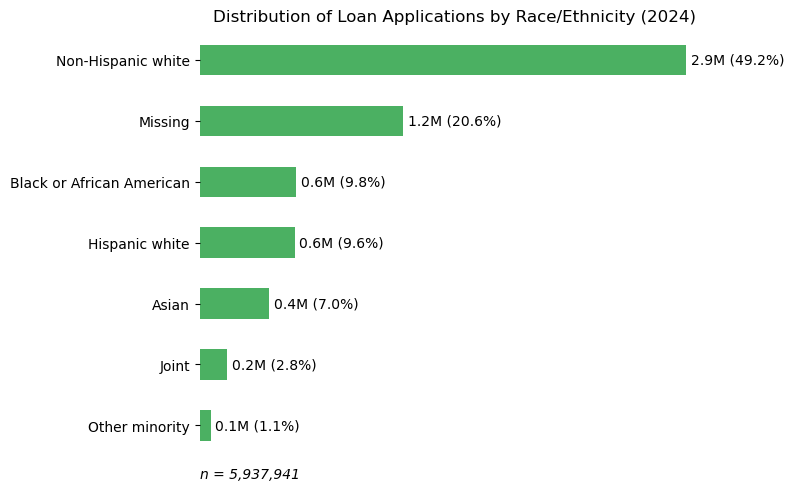

In [20]:
plot_category_distribution(df, 'derived_race_ethnicity', title='Distribution of Loan Applications by Race/Ethnicity (2024)')

### Loan types

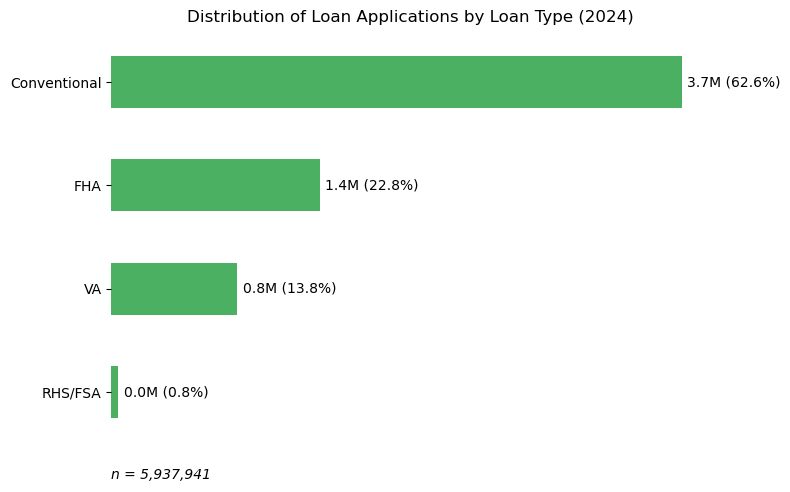

In [21]:
plot_category_distribution(df, 'loan_type',title="Distribution of Loan Applications by Loan Type (2024)")

### Cross tabulation

In [22]:
ct = pd.crosstab(df['derived_race_ethnicity'], df['loan_type'], margins=True, margins_name="Total")
print(ct)

loan_type                  Conventional      FHA  RHS/FSA      VA    Total
derived_race_ethnicity                                                    
Asian                            356299    40893      310   17928   415430
Black or African American        233267   226794     3538  117618   581217
Hispanic white                   314012   201207     3846   50387   569452
Joint                             94491    36412     1178   31488   163569
Missing                          712915   298996     5076  206334  1223321
Non-Hispanic white              1974153   533136    31427  381311  2920027
Other minority                    31504    19297      525   13599    64925
Total                           3716641  1356735    45900  818665  5937941


## Approval Rates

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def butterfly_rates(
    df, col, *,
    group_col="decision",
    values=("Denied", "Approved"),
    title=None, category_order=None,
    dropna=True, na_label="NA", min_share_other=None, other_label="Other",
    height_per_row=0.4, min_height=3.0, legend_title=None,
    colors=("tab:red", "tab:green"), return_data=True,
    show_counts_on_bars=False, show_total_in_labels=True,
    show_pct_on_bars=True, pct_decimals=0,
    # NEW
    ax=None, show_overall_n=True
):
    if not isinstance(values, (list, tuple)) or len(values) != 2:
        raise ValueError("`values` must be a 2-element tuple/list, e.g., ('A','B').")
    if len(colors) != 2:
        raise ValueError("`colors` must be a 2-element tuple to match `values`.")

    left_val, right_val = values
    denied_color, approved_color = colors

    s = df[col].copy()
    if dropna:
        s = s.dropna()
    else:
        s = s.fillna(na_label)

    counts = df.groupby([col, group_col], observed=True).size().unstack(fill_value=0)

    for v in values:
        if v not in counts.columns:
            counts[v] = 0

    counts = counts[list(values)].copy()
    counts["Total"] = counts[left_val] + counts[right_val]

    if min_share_other is not None and min_share_other > 0 and counts["Total"].sum() > 0:
        share = counts["Total"] / counts["Total"].sum()
        small = share < min_share_other
        if small.any():
            other_row = counts.loc[small, list(values)].sum()
            counts = counts.loc[~small, list(values)]
            if other_row.sum() > 0:
                counts.loc[other_label] = other_row
            counts["Total"] = counts[left_val] + counts[right_val]

    if category_order is not None:
        full_idx = pd.Index(list(category_order))
        counts = counts.reindex(full_idx, fill_value=0)
        counts["Total"] = counts[left_val] + counts[right_val]

    nonzero = counts["Total"] > 0
    rates = pd.DataFrame(index=counts.index)
    left_rate_col = f"{left_val}Rate"
    right_rate_col = f"{right_val}Rate"
    rates[left_rate_col]  = np.where(nonzero, counts[left_val]  / counts["Total"], 0.0)
    rates[right_rate_col] = np.where(nonzero, counts[right_val] / counts["Total"], 0.0)

    if category_order is None:
        rates = rates.sort_values(left_rate_col, ascending=False)
        counts = counts.loc[rates.index]

    counts_aligned = counts.loc[rates.index, [left_val, right_val, "Total"]].copy()

    labels = rates.index.tolist()
    y = np.arange(len(labels))

    left = -rates[left_rate_col].to_numpy()
    right = rates[right_rate_col].to_numpy()

    xmax = 0.0
    if left.size > 0:
        xmax = max(np.max(np.abs(left)), np.max(np.abs(right)))
    xlim = (-xmax, xmax) if xmax > 0 else (-1.0, 1.0)

    fig = None
    if ax is None:
        fig_height = max(min_height, height_per_row * max(1, len(labels)))
        fig, ax = plt.subplots(figsize=(10, fig_height), constrained_layout=True)
    else:
        fig = ax.figure

    ax.barh(y, left,  color=denied_color, label=left_val,  height=0.6)
    ax.barh(y, right, color=approved_color, label=right_val, height=0.6)
    ax.axvline(0, linewidth=1)

    if show_total_in_labels:
        labels_with_n = [f"{lab}  (N={counts_aligned.loc[lab, 'Total']/1e6:.1f}M)" for lab in labels]
        ax.set_yticks(y, labels_with_n)
    else:
        ax.set_yticks(y, labels)

    ax.set_xlabel("Rate")
    if title is None:
        title = f"{left_val} vs {right_val} Rates by {col}"
    ax.set_title(title)
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))
    ax.set_xlim(xlim)

    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.xaxis.grid(True, linestyle=":", linewidth=0.7)
    ax.set_axisbelow(True)

    ax.legend(bbox_to_anchor=(1.1, 0.5), loc="center left",
              title=(legend_title if legend_title is not None else group_col))

    pad = 0.02 * (xmax if xmax > 0 else 1.0)

    if show_counts_on_bars and len(labels) > 0:
        for i, lab in enumerate(labels):
            n_left = int(counts_aligned.loc[lab, left_val])
            n_right = int(counts_aligned.loc[lab, right_val])

            x_den = left[i]
            den_text_x = (x_den - pad) if x_den < -1e-12 else -pad
            ax.text(den_text_x, y[i], f"n={n_left:,}", va="center", ha="right", fontsize=9)

            x_app = right[i]
            app_text_x = (x_app + pad) if x_app > 1e-12 else pad
            ax.text(app_text_x, y[i], f"n={n_right:,}", va="center", ha="left", fontsize=9)

    if show_pct_on_bars and len(labels) > 0:
        fmt = "{:." + str(pct_decimals) + "%}"
        for i, lab in enumerate(labels):
            l_pct = rates.loc[lab, left_rate_col]
            r_pct = rates.loc[lab, right_rate_col]
            if l_pct > 0:
                x_den = left[i]
                ax.text(x_den - pad, y[i], fmt.format(l_pct), va="center", ha="right", fontsize=9)
            if r_pct > 0:
                x_app = right[i]
                ax.text(x_app + pad, y[i], fmt.format(r_pct), va="center", ha="left", fontsize=9)

    if show_overall_n:
        total_n = int(counts_aligned["Total"].sum())
        ax.text(-.25, -0.12, f"Total N = {total_n/1e6:.1f}M",
                transform=ax.transAxes, ha="left", va="top", fontsize=10, fontstyle="italic")

    if return_data:
        out = rates.copy()
        return fig, ax, out
    return fig, ax, None

In [24]:
race_ethnicity_order = ['Non-Hispanic white', 'Hispanic white', 'Black or African American', 'Asian',  'Joint', 'Missing','Other minority']


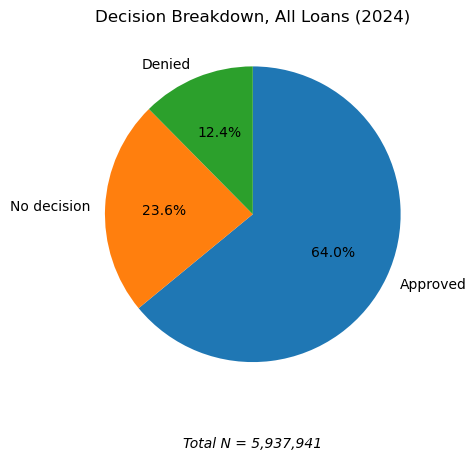

In [25]:

# Proportions
counts = df.decision.value_counts(normalize=True)
total_n = len(df)

fig, ax = plt.subplots()
ax.pie(
    counts,
    labels=counts.index,
    autopct="%.1f%%",
    startangle=90,
    counterclock=False
)

ax.set_title("Decision Breakdown, All Loans (2024)")

# Annotate with total N below the chart
ax.text(
    0.5, -0.1,
    f"Total N = {total_n:,}",
    transform=ax.transAxes,
    ha="center", va="top", fontsize=10, fontstyle="italic"
)

plt.show()

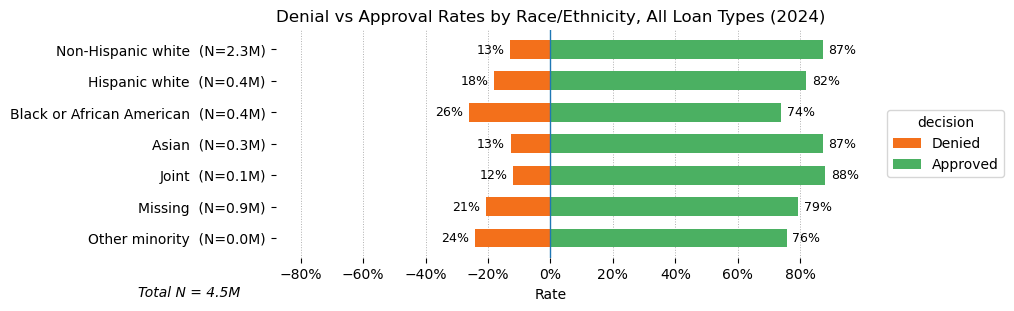

                           DeniedRate  ApprovedRate
Other minority               0.242935      0.757065
Missing                      0.206160      0.793840
Joint                        0.119551      0.880449
Asian                        0.127854      0.872146
Black or African American    0.260814      0.739186
Hispanic white               0.180371      0.819629
Non-Hispanic white           0.128699      0.871301


In [26]:
fig, ax, dva = butterfly_rates( 
    df,
    "derived_race_ethnicity",
    title=f"Denial vs Approval Rates by Race/Ethnicity, All Loan Types (2024)",
    colors=(plt.cm.Oranges(0.6),plt.cm.Greens(0.6)),
    category_order=reversed(race_ethnicity_order)
)
plt.show()
print(dva)

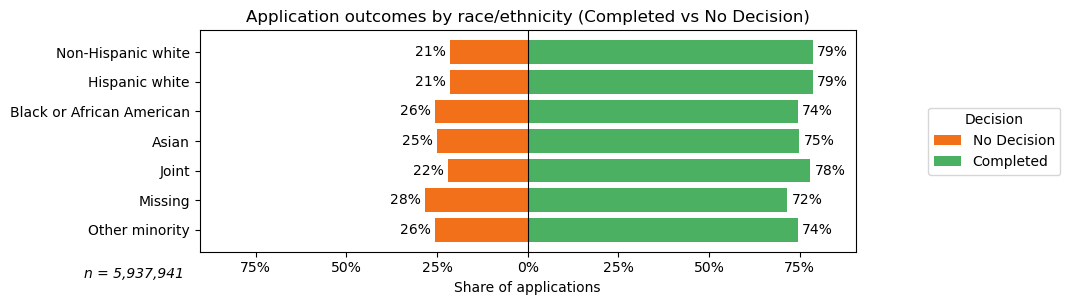

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def butterfly_decision_by_race(
    df,
    race_col="derived_race_ethnicity",
    decision_col="decision",
    *,
    title="Application outcomes by race/ethnicity (Completed vs No Decision)",
    na_race_label="Missing",
    no_decision_aliases=("no decision","no_decision","no-decision"),
    category_order=None,          # <-- new parameter
    sort_by="Completed",          # fallback: "Completed", "No Decision", or None
    ascending=False,
    height_per_row=0.45,
    min_height=3.0,
    show_group_n=True,            # show grand total annotation
    show_pct_on_bars=True,
    pct_decimals=0,
    colors=(plt.cm.Oranges(0.6), plt.cm.Greens(0.6))
):
    data = df.copy()

    # Normalize decisions
    dec_norm = data[decision_col].astype(str).str.strip().str.lower()
    is_completed   = dec_norm.isin({"approved", "denied"})
    is_no_decision = dec_norm.isin(set(no_decision_aliases))

    data = data[is_completed | is_no_decision].copy()
    if data.empty:
        print("No rows matched expected decision values. Check decision strings.")
        return

    data["decision_grouped"] = np.where(
        dec_norm.loc[data.index].isin(no_decision_aliases), "No Decision", "Completed"
    )

    # Handle missing race
    data[race_col] = data[race_col].fillna(na_race_label)

    # Counts and proportions
    counts = (data.groupby([race_col, "decision_grouped"], observed=True)
                   .size()
                   .unstack(fill_value=0))
    for c in ["Completed", "No Decision"]:
        if c not in counts.columns:
            counts[c] = 0

    totals = counts.sum(axis=1)
    props = counts.div(totals.replace(0, np.nan), axis=0).fillna(0)

    # Apply explicit category order if given
    if category_order is not None:
        # filter to categories actually present
        valid_order = [c for c in category_order if c in props.index]
        props = props.reindex(valid_order)
        counts = counts.reindex(props.index)
        totals = totals.reindex(props.index)
    elif sort_by in props.columns:  # fallback sorting
        props = props.sort_values(by=sort_by, ascending=ascending)
        counts = counts.reindex(props.index)
        totals = totals.reindex(props.index)

    # Mirror values
    left_vals  = -props["No Decision"].values
    right_vals =  props["Completed"].values
    y_pos = np.arange(len(props))

    # Figure size
    h = max(min_height, len(props) * height_per_row)
    fig, ax = plt.subplots(figsize=(11, h))

    # Bars
    left_bars = ax.barh(y_pos, left_vals,  align="center", label="No Decision", color=colors[0])
    right_bars= ax.barh(y_pos, right_vals, align="center", label="Completed",  color=colors[1])

    ax.set_yticks(y_pos)
    ax.set_yticklabels(list(props.index))

    ax.axvline(0, color="black", linewidth=0.8)

    # Format x-axis as percent
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{abs(x):.0%}"))

    ax.set_xlabel("Share of applications")
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.1, 0.5), loc="center left", title="Decision")

    # Symmetric x-limits
    max_pct = max(right_vals.max(), abs(left_vals.min()))
    ax.set_xlim(-max_pct * 1.15, max_pct * 1.15)

    # Percent labels
    if show_pct_on_bars:
        for bars, side in [(left_bars, "left"), (right_bars, "right")]:
            for b in bars:
                w = b.get_width()
                if w == 0:
                    continue
                label = f"{abs(w)*100:.{pct_decimals}f}%"
                offset = -3 if side == "left" else 3
                ha = "right" if side == "left" else "left"
                ax.annotate(
                    label,
                    xy=(b.get_x() + b.get_width(), b.get_y() + b.get_height()/2),
                    xytext=(offset, 0),
                    textcoords="offset points",
                    va="center", ha=ha
                )

    if show_group_n:
        grand_total = int(totals.sum())
        ax.annotate(
            f"n = {grand_total:,}",
            xy=(-0.1, -0.07),                # centered below plot
            xycoords="axes fraction",
            ha="center", va="top",
            fontsize=10, fontstyle="italic"
        )

    plt.tight_layout()
    plt.show()

# Example:
butterfly_decision_by_race(df, category_order=reversed(race_ethnicity_order))

In [28]:
# impute a new feature "Outcome" to account for the impact of disparity in no-decision cases
df["outcome"] = np.where(df["decision"] == "Approved", "Approved", "Not Approved")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5937941 entries, 2595 to 12218579
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   derived_ethnicity       object  
 1   derived_race            category
 2   action_taken            category
 3   loan_type               category
 4   loan_purpose            int64   
 5   loan_amount             int64   
 6   interest_rate           float64 
 7   total_loan_costs        float64 
 8   intro_rate_period       float64 
 9   income                  float64 
 10  debt_to_income_ratio    category
 11  decision                category
 12  interest_rate_type      category
 13  derived_race_ethnicity  category
 14  outcome                 object  
dtypes: category(7), float64(4), int64(2), object(2)
memory usage: 576.4+ MB


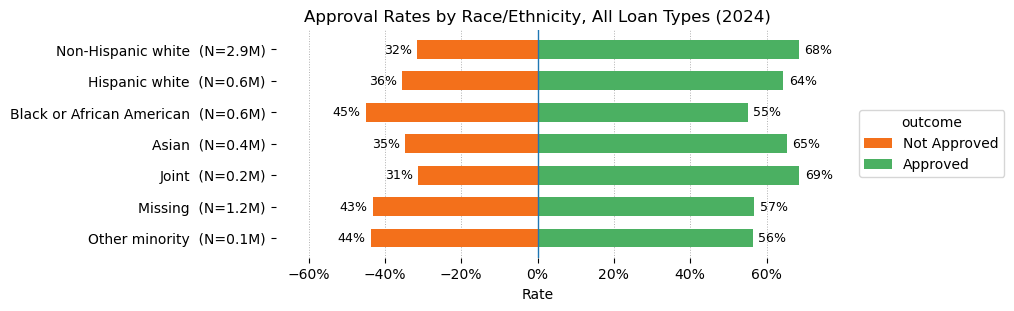

                           Not ApprovedRate  ApprovedRate
Other minority                     0.436396      0.563604
Missing                            0.431551      0.568449
Joint                              0.313556      0.686444
Asian                              0.346612      0.653388
Black or African American          0.449331      0.550669
Hispanic white                     0.355580      0.644420
Non-Hispanic white                 0.315108      0.684892


In [30]:
fig, ax, dva = butterfly_rates( 
    df,
    "derived_race_ethnicity",
    title=f"Approval Rates by Race/Ethnicity, All Loan Types (2024)",
    colors=(plt.cm.Oranges(0.6),plt.cm.Greens(0.6)),
    category_order=reversed(race_ethnicity_order),
    group_col="outcome",
    values=("Not Approved","Approved"),
    show_overall_n=False
)
plt.show()
print(dva)

In [31]:
import math

def butterfly_grid_by(
    df, facet_col="loan_type", *,
    col="derived_race_ethnicity",
    group_col="decision", values=("Denied","Approved"),
    facet_order=None, category_order=None,
    ncols=2,
    base_width=6, base_height_per_row=0.4, base_min_height=3.0,
    sharey=True,
    colors=("tab:red","tab:green"),
    pct_decimals=0,
    show_counts_on_bars=False,
    show_pct_on_bars=True,
    show_total_in_labels=True,
    suptitle=None
):
    # Facet levels
    if facet_order is None:
        facets = pd.Index(sorted(df[facet_col].dropna().unique()))
    else:
        facets = pd.Index(list(facet_order))

    n = len(facets)
    ncols = min(ncols, n) if n > 0 else 1
    nrows = int(math.ceil(n / ncols))

    # Determine consistent category order if not provided:
    if category_order is None:
        # Order by overall left-value rate across the entire dataset
        tmp_counts = df.groupby([col, group_col], observed=True).size().unstack(fill_value=0)
        for v in values:
            if v not in tmp_counts.columns:
                tmp_counts[v] = 0
        tmp_counts["Total"] = tmp_counts[values[0]] + tmp_counts[values[1]]
        nonzero = tmp_counts["Total"] > 0
        tmp_rates = (tmp_counts[values[0]] / tmp_counts["Total"]).where(nonzero, 0.0)
        category_order = tmp_rates.sort_values(ascending=False).index.tolist()

    # Compute a reasonable figure height based on how many categories we’ll show
    n_cats = len(category_order)
    fig_height = max(base_min_height, base_height_per_row * max(1, n_cats))
    fig_width = base_width * ncols

    fig, axes = plt.subplots(
        nrows, ncols, figsize=(fig_width, fig_height * nrows),
        sharey=sharey, constrained_layout=True
    )
    axes = np.atleast_1d(axes).reshape(nrows, ncols)

    for i, facet in enumerate(facets):
        r, c = divmod(i, ncols)
        ax = axes[r, c]
        sub = df[df[facet_col] == facet]

        # Only leftmost column shows long y labels
        show_labels_here = show_total_in_labels if c == 0 else False
        # Only the first panel shows the overall N to avoid clutter
        show_overall_n_here = (i == 0)

        butterfly_rates(
            sub, col,
            group_col=group_col, values=values,
            title=str(facet),
            category_order=category_order,
            dropna=True, na_label="NA",
            min_share_other=None, other_label="Other",
            height_per_row=base_height_per_row, min_height=fig_height,
            legend_title=facet_col if i == 0 else None,  # legend title on first only
            colors=colors, return_data=False,
            show_counts_on_bars=show_counts_on_bars,
            show_total_in_labels=show_labels_here,
            show_pct_on_bars=show_pct_on_bars,
            pct_decimals=pct_decimals,
            ax=ax, show_overall_n=show_overall_n_here
        )

        # For interior panels, hide y tick labels if we’re sharing y
        if sharey and c > 0:
            ax.set_yticklabels([])

        # Put legend only on the last panel (or first)—avoid repeats
        if i < n - 1:
            ax.legend_.remove()

    # Hide any unused axes
    for j in range(n, nrows * ncols):
        r, c = divmod(j, ncols)
        axes[r, c].axis("off")

    if suptitle:
        fig.suptitle(suptitle, y=1.02)

    return fig, axes

Text(0.01, 0.01, 'Overall N = 5.9M')

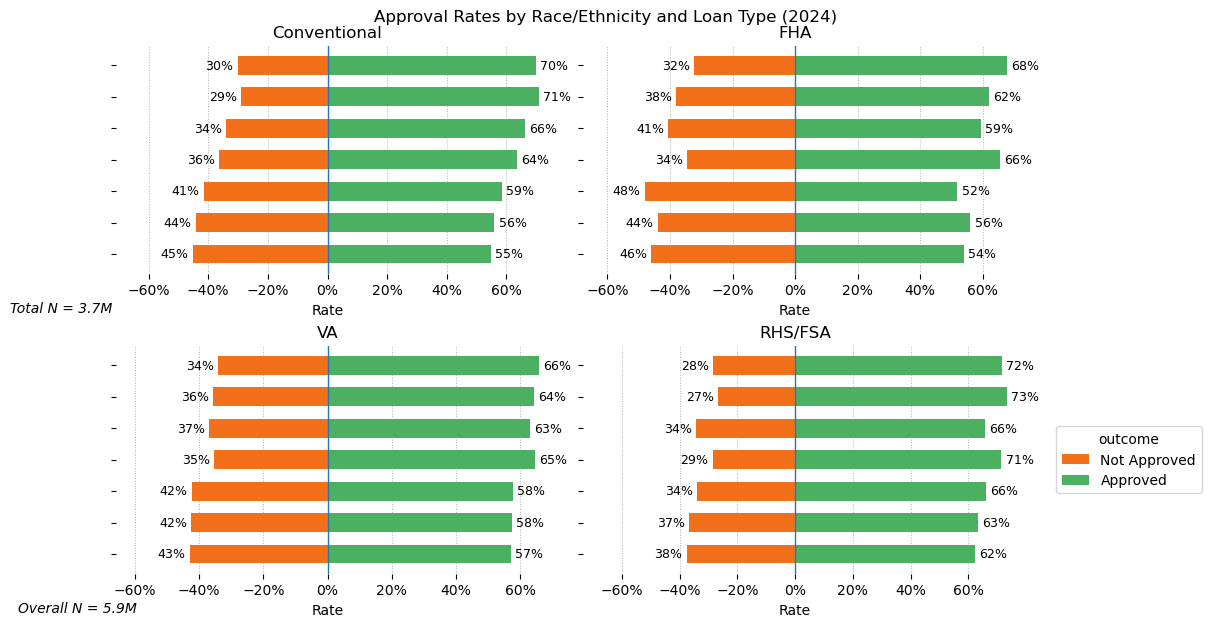

In [32]:
facet_order = ["Conventional", "FHA", "VA", "RHS/FSA"]  # adjust if your labels differ

fig, axes = butterfly_grid_by(
    df,
    facet_col="loan_type",
    facet_order=facet_order,        # keeps a consistent panel order
    col="derived_race_ethnicity",
    group_col="outcome",
    values=("Not Approved","Approved"),
    ncols=2,                        # -> 2x2 grid for 4 types
    colors=(plt.cm.Oranges(0.6), plt.cm.Greens(0.6)),
    pct_decimals=0,
    show_counts_on_bars=False,
    show_pct_on_bars=True,
    show_total_in_labels=False,      # only left column shows labels (others hide)
    suptitle="Approval Rates by Race/Ethnicity and Loan Type (2024)"
)

# Optional: annotate overall N for the entire dataset (not per panel)
total_n = int(df.shape[0])
fig.text(0.01, 0.01, f"Overall N = {total_n/1e6:.1f}M", ha="left", va="bottom", fontsize=10, style="italic")

In [33]:
import pandas as pd
import numpy as np

def make_rates_table(
    df, *,
    row="derived_race_ethnicity",
    facet="loan_type",
    group="decision",
    values=("Denied","Approved"),
    add_total_row=True,
    row_order=None,
    sort_by=("Denied", True),     # (value_name, descending?)
    pct_decimals=0,
    n_thousands_sep=True,
    include_N=True,               # NEW: toggle whether to include N columns
    return_formatted=True
):
    left, right = values

    base = (
        df.groupby([row, facet, group], observed=True)
          .size()
          .unstack(group, fill_value=0)
    )
    for v in values:
        if v not in base.columns:
            base[v] = 0
    base = base[list(values)].copy()
    base["Total"] = base[left] + base[right]

    blocks = {}
    for lt, sub in base.groupby(level=1, observed=True):
        sub = sub.droplevel(1)
        nz = sub["Total"] > 0
        r_left  = np.where(nz, sub[left]  / sub["Total"], 0.0)
        r_right = np.where(nz, sub[right] / sub["Total"], 0.0)

        small = pd.DataFrame({
            f"%{left}": r_left,
            f"%{right}": r_right,
        }, index=sub.index)

        if include_N:
            small["N"] = sub["Total"]

        blocks[lt] = small

    out = pd.concat(blocks, axis=1)

    if row_order is not None:
        out = out.reindex(row_order)

    if sort_by is not None and row_order is None and len(out) > 0:
        sort_val, descending = sort_by
        b2 = base.reset_index()
        agg = (
            b2.groupby(row)[[left, "Total"]].sum()
            .assign(overall_rate=lambda d: np.where(d["Total"]>0, d[left]/d["Total"], 0.0))
        )
        out = out.loc[agg.sort_values("overall_rate", ascending=not descending).index]

    if add_total_row and len(out) > 0:
        totals = {}
        for lt, sub in base.groupby(level=1, observed=True):
            tot = sub.droplevel(1).sum(axis=0)
            if tot["Total"] > 0:
                totals[(lt, f"%{left}")]  = tot[left]  / tot["Total"]
                totals[(lt, f"%{right}")] = tot[right] / tot["Total"]
            else:
                totals[(lt, f"%{left}")]  = 0.0
                totals[(lt, f"%{right}")] = 0.0
            if include_N:
                totals[(lt, "N")] = tot["Total"]
        total_row = pd.Series(totals, name="Total")
        total_row = total_row.reindex(out.columns)
        out = pd.concat([out, total_row.to_frame().T])

    if return_formatted:
        fmt = out.copy()
        for lt in fmt.columns.get_level_values(0).unique():
            for metric in (f"%{left}", f"%{right}"):
                col = (lt, metric)
                if col in fmt.columns:
                    fmt[col] = (fmt[col] * 100).round(pct_decimals).map(
                        lambda x: f"{x:.{pct_decimals}f}%"
                    )
            if include_N:
                colN = (lt, "N")
                if colN in fmt.columns:
                    if n_thousands_sep:
                        fmt[colN] = fmt[colN].astype(int).map(lambda x: f"{x:,}")
                    else:
                        fmt[colN] = fmt[colN].astype(int).astype(str)

        # Order columns inside each facet
        ordered_cols = []
        for lt in out.columns.get_level_values(0).unique():
            for m in ([f"%{left}", f"%{right}"] + (["N"] if include_N else [])):
                col = (lt, m)
                if col in out.columns:
                    ordered_cols.append(col)
        fmt = fmt[ordered_cols]
        fmt.columns = pd.MultiIndex.from_tuples(fmt.columns, names=[facet, "Metric"])
        return fmt

    # Numeric return
    ordered_cols = []
    for lt in out.columns.get_level_values(0).unique():
        for m in ([f"%{left}", f"%{right}"] + (["N"] if include_N else [])):
            col = (lt, m)
            if col in out.columns:
                ordered_cols.append(col)
    out = out[ordered_cols]
    out.columns = pd.MultiIndex.from_tuples(out.columns, names=[facet, "Metric"])
    return out

In [34]:
make_rates_table(df, row_order=race_ethnicity_order, group="outcome", values=("Not Approved","Approved"),add_total_row=False, include_N=False)

loan_type                  Conventional                     FHA            \
Metric                    %Not Approved %Approved %Not Approved %Approved   
derived_race_ethnicity                                                      
Non-Hispanic white                  29%       71%           38%       62%   
Hispanic white                      36%       64%           34%       66%   
Black or African American           45%       55%           46%       54%   
Asian                               34%       66%           41%       59%   
Joint                               30%       70%           32%       68%   
Missing                             41%       59%           48%       52%   
Other minority                      44%       56%           44%       56%   

loan_type                       RHS/FSA                      VA            
Metric                    %Not Approved %Approved %Not Approved %Approved  
derived_race_ethnicity                                                     
Non-Hispanic white                  27%       73%           36%       64%  
Hispanic white                      29%       71%           35%       65%  
Black or African American           38%       62%           43%       57%  
Asian                               34%       66%           37%       63%  
Joint                               28%       72%           34%       66%  
Missing                             34%       66%           42%       58%  
Other minority                      37%       63%           42%       58%

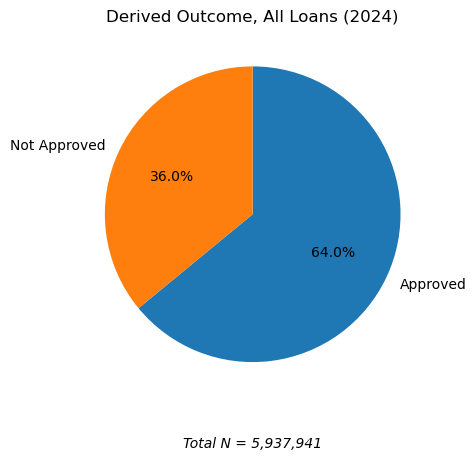

In [35]:
# Proportions
counts = df.outcome.value_counts(normalize=True)
total_n = len(df)

fig, ax = plt.subplots()
ax.pie(
    counts,
    labels=counts.index,
    autopct="%.1f%%",
    startangle=90,
    counterclock=False
)

ax.set_title("Derived Outcome, All Loans (2024)")

# Annotate with total N below the chart
ax.text(
    0.5, -0.1,
    f"Total N = {total_n:,}",
    transform=ax.transAxes,
    ha="center", va="top", fontsize=10, fontstyle="italic"
)

plt.show()